<a href="https://colab.research.google.com/github/AceKnightWalker/OEL_Prediction/blob/main/OEL_ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analaysis of the Data

In [ ]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
sns.set_style("whitegrid")

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from IPython.display import display
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
!pip install rdkit-pypi

In [ ]:
data = pd.read_csv("df_exposition_main.csv")

In [ ]:
data.head(10)

,Name,CAS.Number,Synonyms,Observation,Year,TMP,FT,VLEP.8h..ppm.,VLEP.8h..mg.m3.,VLEP.CT..ppm.,VLEP.CT..mg.m3.,Type.of.limit.value,SMILES
0,(2-méthoxyméthylethoxy)-propanol,34590-94-8,Ether méthylique du dipropylène-glycol,Risque de pénétration percutanée,2007,84,NaN,50.0,308.0,NaN,NaN,Valeurs limites réglementaires contraignantes ...,COC(C)COC(C)CO
1,"1,1,1,2-Tétrachlorodifluoroéthane",76-11-9,NaN,NaN,1987,NaN,NaN,500.0,4170.0,NaN,NaN,NaN,FC(F)(Cl)C(Cl)(Cl)Cl
2,"1,1,1-Trichloroéthane",71-55-6,NaN,NaN,2006,12,26.0,100.0,555.0,200.0,1110.0,Valeurs limites réglementaires contraignantes ...,CC(Cl)(Cl)Cl
3,"1,1,2,2-Tétrabromoéthane",79-27-6,Tétrabromure d'acétylène,NaN,1987,NaN,NaN,1.0,15.0,NaN,NaN,NaN,BrC(Br)C(Br)Br
4,"1,1,2,2-Tétrachlorodifluoroéthane",76-12-0,NaN,NaN,1987,NaN,NaN,500.0,4170.0,NaN,NaN,NaN,FC(Cl)(Cl)C(F)(Cl)Cl
5,"1,1,2,2-Tétrachloroéthane",79-34-5,NaN,NaN,1983,3,36.0,1.0,7.0,5.0,35.0,NaN,ClC(Cl)C(Cl)Cl
6,"1,1,2-Trichlorotrifluoroéthane (F 113)",76-13-1,NaN,NaN,1983,NaN,65.0,1000.0,7600.0,1250.0,9500.0,NaN,FC(F)(Cl)C(F)(Cl)Cl
7,"1,1-Dichloro-1-nitroéthane",594-72-9,NaN,NaN,1987,NaN,NaN,2.0,10.0,NaN,NaN,NaN,CC(Cl)(Cl)[N+]([O-])=O
8,"1,1-Dichloroéthane",75-34-3,NaN,Risque de pénétration percutanée,2004,NaN,NaN,100.0,412.0,NaN,NaN,Valeurs limites réglementaires indicatives (ar...,CC(Cl)Cl
9,"1,1-Dichloroéthylène",75-35-4,Chlorure de vinylidène,Cancérogène de catégorie 2,2019,12,NaN,2.0,8.0,5.0,20.0,Valeurs limites réglementaires contraignantes ...,ClC(Cl)=C


In [ ]:
data.describe()

In [ ]:
new_df = data[['VLEP.8h..mg.m3.', 'SMILES']].copy()

In [ ]:
new_df.dropna(inplace=True)

In [ ]:
new_df.count()

VLEP.8h..mg.m3.    367
SMILES             367
dtype: int64

In [ ]:
new_df.sort_values(by='VLEP.8h..mg.m3.', ascending=False, inplace=True)

In [ ]:
new_df.rename(columns={'VLEP.8h..mg.m3.': 'VLEP'}, inplace=True)

In [ ]:
new_df

,VLEP,SMILES
6,7600.000,FC(F)(Cl)C(F)(Cl)Cl
18,7000.000,FC(F)(Cl)C(F)(F)Cl
155,6320.000,FC(F)(F)C(F)(F)Cl
142,6100.000,FC(F)(F)Br
180,4950.000,FC(F)(Cl)Cl
1,4170.000,FC(F)(Cl)C(Cl)(Cl)Cl
4,4170.000,FC(Cl)(Cl)C(F)(Cl)Cl
152,3600.000,FC(F)Cl
249,3100.000,COCOC
292,3000.000,CCCCC


In [ ]:
new_df.describe()

,VLEP
count,367.000000
mean,275.092098
std,913.939197
min,0.005000
25%,1.000000
50%,10.000000
75%,100.000000
max,7600.000000


In [ ]:
duplicate_series = new_df[new_df.duplicated(['SMILES'], keep=False)]

In [ ]:
duplicate_series

,VLEP,SMILES
265,221.00,Cc1cccc(C)c1
383,221.00,Cc1cccc(C)c1
14,25.00,NCCN
167,4.00,NCCN
186,0.25,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl
50,0.22,Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl
208,0.10,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl
56,0.01,Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl


In [ ]:
rows_to_delete = [265, 14, 186, 50]

main_df = new_df.drop(rows_to_delete, axis=0)

main_df = main_df.reset_index(drop=True)


In [ ]:
main_df.describe()

,VLEP
count,363.000000
mean,277.444435
std,918.646139
min,0.005000
25%,1.000000
50%,10.000000
75%,100.000000
max,7600.000000


In [ ]:
# Function to generate molecular formula from SMILES
def generate_molecular_formula(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        formula = Chem.rdMolDescriptors.CalcMolFormula(mol)
        return formula
    else:
        return None


main_df['Molecular_Formula'] = main_df['SMILES'].apply(generate_molecular_formula)

In [ ]:
PandasTools.AddMoleculeColumnToFrame(main_df, 'SMILES', 'Molecule', includeFingerprints=True)

display(main_df)

In [ ]:
pd.set_option('display.max_rows', 10)

# Hydrocarbons

In [1]:
Hydrocarbons_df = main_df[main_df['Molecular_Formula'].str.contains('P|S|N|F|Cl|Br|I|O') == False]
PandasTools.AddMoleculeColumnToFrame(Hydrocarbons_df, 'SMILES', 'Molecule', includeFingerprints=True)
display(Hydrocarbons_df)

NameError: name 'PandasTools' is not defined

# Oxygenates

,VLEP,SMILES,Molecular_Formula,Molecule
8,3100.00,COCOC,C3H8O2,
12,1920.00,COC,C2H6O,
13,1900.00,CCO,C2H6O,
20,1210.00,CC(C)=O,C3H6O,
22,1050.00,CC(C)OC(C)C,C6H14O,
...,...,...,...,...
323,0.10,CC(C)(C)C(=O)C1C(=O)c2ccccc2C1=O,C14H14O3,
334,0.10,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,C19H16O4,
353,0.07,CC(=O)C(C)=O,C4H6O2,
354,0.05,C=CC=O,C3H4O,

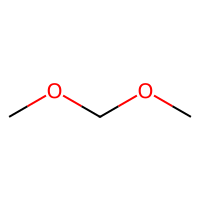
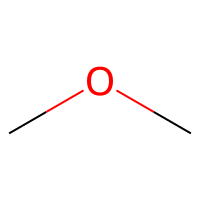
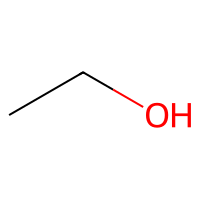
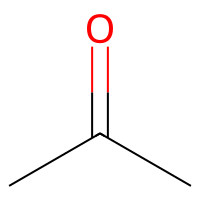
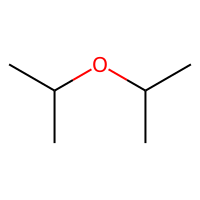
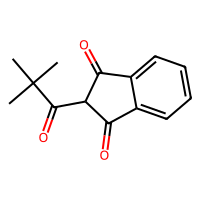
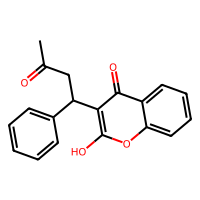
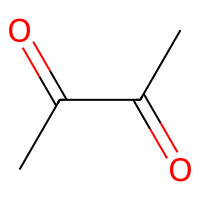
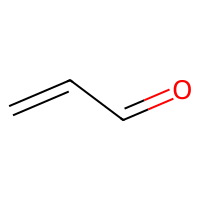
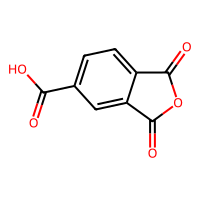

In [ ]:
Oxygenates_df = main_df[main_df['Molecular_Formula'].str.contains('P|S|F|Cl|N|Br|I') == False]
Oxygenates_df = Oxygenates_df[Oxygenates_df['Molecular_Formula'].str.contains('O') == True]

PandasTools.AddMoleculeColumnToFrame(Oxygenates_df, 'SMILES', 'Molecule', includeFingerprints=True)

display(Oxygenates_df)

# Halogens

,VLEP,SMILES,Molecular_Formula,Molecule
0,7600.00,FC(F)(Cl)C(F)(Cl)Cl,C2Cl3F3,
1,7000.00,FC(F)(Cl)C(F)(F)Cl,C2Cl2F4,
2,6320.00,FC(F)(F)C(F)(F)Cl,C2ClF5,
3,6100.00,FC(F)(F)Br,CBrF3,
4,4950.00,FC(F)(Cl)Cl,CCl2F2,
...,...,...,...,...
297,0.50,ClCC1(CCl)C(=C)C2(Cl)C(Cl)C(Cl)C1(Cl)C2(Cl)Cl,C10H8Cl8,
298,0.50,ClC1CC2C(C1Cl)C3(Cl)C(=C(Cl)C2(Cl)C3(Cl)Cl)Cl,C10H6Cl8,
312,0.25,ClC1=C(Cl)C2(Cl)C3C4CC(C=C4)C3C1(Cl)C2(Cl)Cl,C12H8Cl6,
335,0.10,ClC1=C(Cl)C(Cl)(Cl)C(=C1Cl)Cl,C5Cl6,

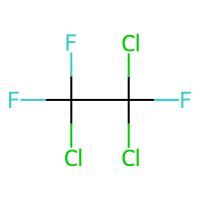
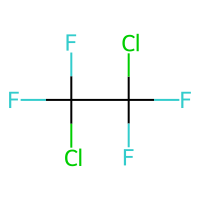
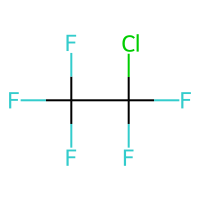
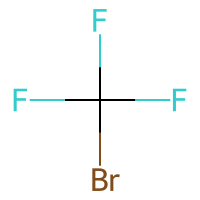
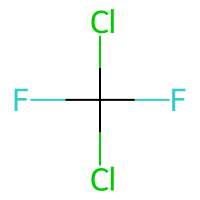
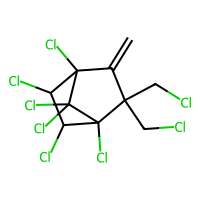
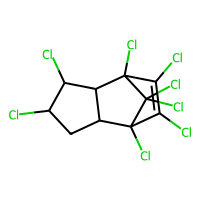
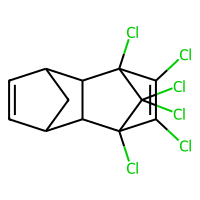
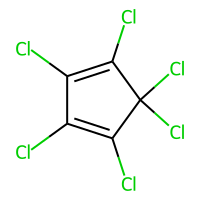
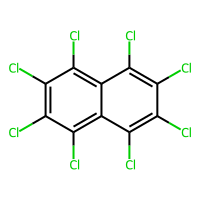

In [ ]:
Halogens_df = main_df[main_df['Molecular_Formula'].str.contains('P|S|N|O') == False]
Halogens_df = Halogens_df[Halogens_df['Molecular_Formula'].str.contains('F|Cl|Br|I') == True]

PandasTools.AddMoleculeColumnToFrame(Halogens_df, 'SMILES', 'Molecule', includeFingerprints=True)

display(Halogens_df)

# Nitrogen Compounds

,VLEP,SMILES,Molecular_Formula,Molecule
102,70.000,CC#N,C2H3N,
126,40.000,NC1CCCCC1,C6H13N,
136,25.000,CN(C)c1ccccc1,C8H11N,
143,20.000,CC(C)NC(C)C,C6H15N,
153,15.000,CCNCC,C4H11N,
...,...,...,...,...
339,0.100,C1CNCCN1,C4H10N2,
351,0.080,Nc1ccc(Cc2ccc(N)cc2)cc1,C13H14N2,
359,0.008,Nc1ccc(cc1)c2ccc(N)cc2,C12H12N2,
360,0.007,Nc1ccc(cc1)c2ccccc2,C12H11N,

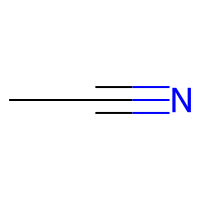
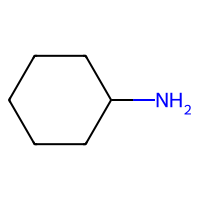
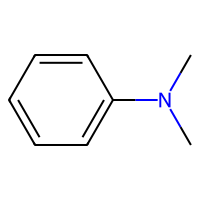
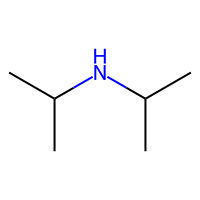
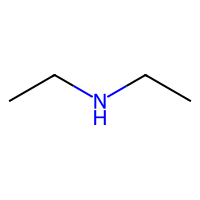
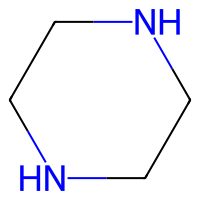
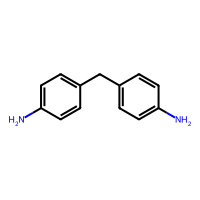
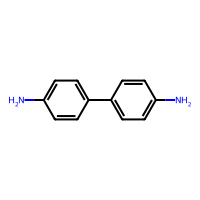
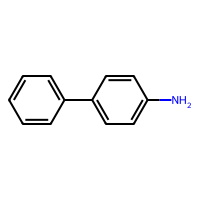
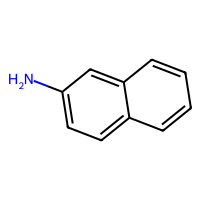

In [ ]:
Nitrogen_df = main_df[main_df['Molecular_Formula'].str.contains('P|S|F|Cl|Br|I|O') == False]
Nitrogen_df = Nitrogen_df[Nitrogen_df['Molecular_Formula'].str.contains('N') == True]

PandasTools.AddMoleculeColumnToFrame(Nitrogen_df, 'SMILES', 'Molecule', includeFingerprints=True)

display(Nitrogen_df)

# Combinations

Containing a combination of the other classed mentioned above. Also sulfur and phosphorus containign compounds fall in this category.

In [ ]:
combined_subsets = pd.concat([Nitrogen_df, Oxygenates_df, Hydrocarbons_df, Halogens_df]).drop_duplicates().reset_index(drop=True)
merged_df = main_df.merge(combined_subsets, how='left', indicator=True)
combinations_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns='_merge')

PandasTools.AddMoleculeColumnToFrame(combinations_df, 'SMILES', 'Molecule', includeFingerprints=True)

display(combinations_df)

# VLEP Distribution

In [ ]:
# Assuming df is your DataFrame and 'column_name' is the column you want to analyze
bins = [float('-inf'), 0.1, 1.0, 10, 50, 500, 5000, float('inf')]
labels = ['<0.1', '0.1-1.0', '1.0-10', '10-50', '50-500', '500-5000', '>5000']

main_df['bin'] = pd.cut(main_df['VLEP.8h..mg.m3.'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences in each bin
count_by_bin = main_df['bin'].value_counts().sort_index()

print(count_by_bin)


bin
<0.1         40
0.1-1.0      54
1.0-10      102
10-50        54
50-500       75
500-5000     34
>5000         4
Name: count, dtype: int64


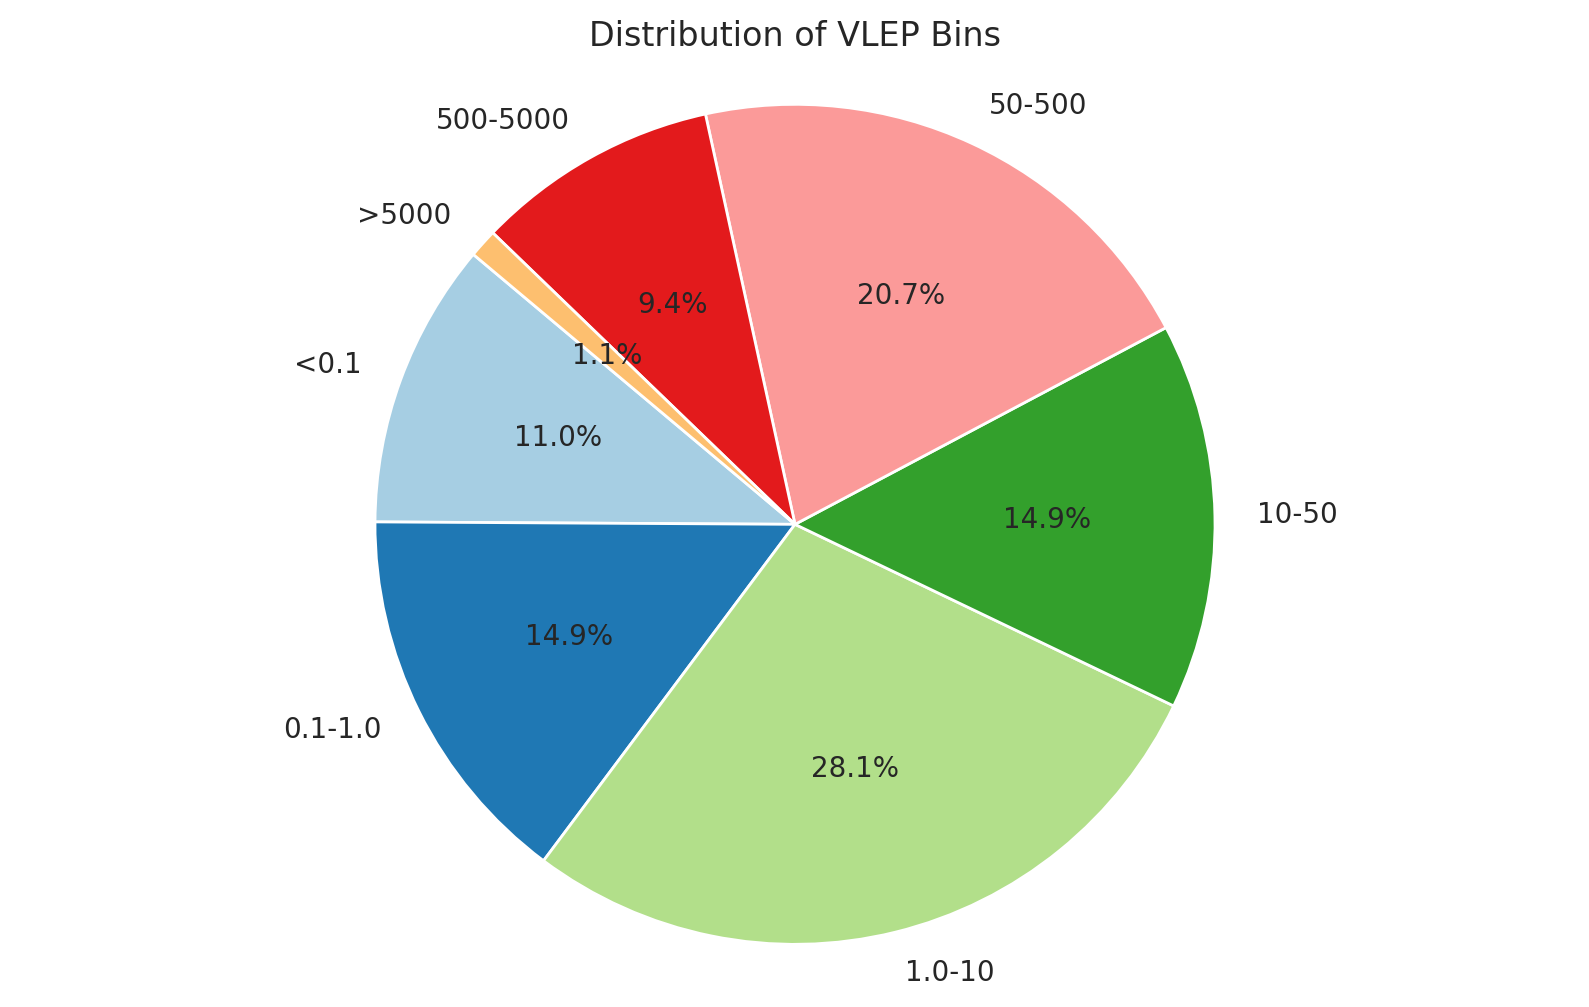

In [ ]:
%matplotlib inline


count_by_bin = {
    '<0.1': 40,
    '0.1-1.0': 54,
    '1.0-10': 102,
    '10-50': 54,
    '50-500': 75,
    '500-5000': 34,
    '>5000': 4
}


labels = list(count_by_bin.keys())
sizes = list(count_by_bin.values())

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sizes))))
plt.title('Distribution of VLEP Bins')
plt.axis('equal')
plt.show()
